## 10 minutes to pandas

In [1]:
import numpy as np

In [2]:
import pandas as pd

## Object creation

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range("20130101", periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [8]:
df

,A,B,C,D
2013-01-01,1.363850,0.535880,-0.142095,-0.665643
2013-01-02,0.476323,-0.542447,-0.462878,-0.390606
2013-01-03,0.194915,-0.908259,1.312540,-0.621146
2013-01-04,-1.724281,0.631801,-0.697507,0.392362
2013-01-05,0.198660,0.219651,2.972785,0.888129
2013-01-06,0.555256,1.256186,-0.073223,0.196874


In [9]:
df2 = pd.DataFrame(
     {
         "A": 1.0,
         "B": pd.Timestamp("20130102"),
         "C": pd.Series(1, index=list(range(4)), dtype="float32"),
         "D": np.array([3] * 4, dtype="int32"),
         "E": pd.Categorical(["test", "train", "test", "train"]),
         "F": "foo",
     }
 )

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting DataFrame have different dtypes.

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [12]:
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.columns
df2.align              df2.copy
df2.all                df2.count
df2.any                df2.combine
df2.append             df2.D
df2.apply              df2.describe
df2.applymap           df2.diff
df2.B                  df2.duplicated

SyntaxError: invalid syntax (<ipython-input-12-4a28990fdc56>, line 1)

## Viewing data

Here is how to view the top and bottom rows of the frame:

In [13]:
df.head()

,A,B,C,D
2013-01-01,1.363850,0.535880,-0.142095,-0.665643
2013-01-02,0.476323,-0.542447,-0.462878,-0.390606
2013-01-03,0.194915,-0.908259,1.312540,-0.621146
2013-01-04,-1.724281,0.631801,-0.697507,0.392362
2013-01-05,0.198660,0.219651,2.972785,0.888129


In [14]:
df.tail(3)

,A,B,C,D
2013-01-04,-1.724281,0.631801,-0.697507,0.392362
2013-01-05,0.198660,0.219651,2.972785,0.888129
2013-01-06,0.555256,1.256186,-0.073223,0.196874


In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.to_numpy()

array([[ 1.36385024,  0.53587997, -0.14209505, -0.66564344],
       [ 0.47632278, -0.54244674, -0.46287753, -0.39060599],
       [ 0.19491483, -0.90825855,  1.31253979, -0.62114571],
       [-1.7242812 ,  0.63180118, -0.69750742,  0.39236165],
       [ 0.1986595 ,  0.219651  ,  2.9727848 ,  0.88812899],
       [ 0.55525612,  1.25618565, -0.0732227 ,  0.19687424]])

In [18]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

> DataFrame.to_numpy() does not include the index or column labels in the output.

describe() shows a quick statistic summary of your data:

In [19]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.177454,0.198802,0.484937,-0.033338
std,1.025373,0.799329,1.405386,0.625506
min,-1.724281,-0.908259,-0.697507,-0.665643
25%,0.195851,-0.351922,-0.382682,-0.563511
50%,0.337491,0.377765,-0.107659,-0.096866
75%,0.535523,0.607821,0.966099,0.343490
max,1.363850,1.256186,2.972785,0.888129


Transposing your data:

In [20]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.363850,0.476323,0.194915,-1.724281,0.198660,0.555256
B,0.535880,-0.542447,-0.908259,0.631801,0.219651,1.256186
C,-0.142095,-0.462878,1.312540,-0.697507,2.972785,-0.073223
D,-0.665643,-0.390606,-0.621146,0.392362,0.888129,0.196874


Sorting by an axis:

In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.665643,-0.142095,0.535880,1.363850
2013-01-02,-0.390606,-0.462878,-0.542447,0.476323
2013-01-03,-0.621146,1.312540,-0.908259,0.194915
2013-01-04,0.392362,-0.697507,0.631801,-1.724281
2013-01-05,0.888129,2.972785,0.219651,0.198660
2013-01-06,0.196874,-0.073223,1.256186,0.555256


Sorting by values:

In [22]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,0.194915,-0.908259,1.312540,-0.621146
2013-01-02,0.476323,-0.542447,-0.462878,-0.390606
2013-01-05,0.198660,0.219651,2.972785,0.888129
2013-01-01,1.363850,0.535880,-0.142095,-0.665643
2013-01-04,-1.724281,0.631801,-0.697507,0.392362
2013-01-06,0.555256,1.256186,-0.073223,0.196874


> While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

## Getting
Selecting a single column, which yields a Series, equivalent to df.A:

In [23]:
df["A"]

2013-01-01    1.363850
2013-01-02    0.476323
2013-01-03    0.194915
2013-01-04   -1.724281
2013-01-05    0.198660
2013-01-06    0.555256
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [24]:
df[0:3]

,A,B,C,D
2013-01-01,1.363850,0.535880,-0.142095,-0.665643
2013-01-02,0.476323,-0.542447,-0.462878,-0.390606
2013-01-03,0.194915,-0.908259,1.312540,-0.621146


In [25]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.476323,-0.542447,-0.462878,-0.390606
2013-01-03,0.194915,-0.908259,1.312540,-0.621146
2013-01-04,-1.724281,0.631801,-0.697507,0.392362


## Selection by label
See more in Selection by Label.

For getting a cross section using a label:

In [26]:
df.loc[dates[0]]

A    1.363850
B    0.535880
C   -0.142095
D   -0.665643
Name: 2013-01-01 00:00:00, dtype: float64

In [27]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,1.363850,0.535880
2013-01-02,0.476323,-0.542447
2013-01-03,0.194915,-0.908259
2013-01-04,-1.724281,0.631801
2013-01-05,0.198660,0.219651
2013-01-06,0.555256,1.256186


In [28]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.476323,-0.542447
2013-01-03,0.194915,-0.908259
2013-01-04,-1.724281,0.631801


In [29]:
df.loc["20130102", ["A", "B"]]

A    0.476323
B   -0.542447
Name: 2013-01-02 00:00:00, dtype: float64

In [30]:
df.loc[dates[0], "A"]

1.3638502418187923

In [31]:
 df.at[dates[0], "A"]

1.3638502418187923

## Selection by position

In [32]:
df.iloc[3]

A   -1.724281
B    0.631801
C   -0.697507
D    0.392362
Name: 2013-01-04 00:00:00, dtype: float64

In [33]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.724281,0.631801
2013-01-05,0.198660,0.219651


In [34]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,0.476323,-0.462878
2013-01-03,0.194915,1.312540
2013-01-05,0.198660,2.972785


In [35]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.476323,-0.542447,-0.462878,-0.390606
2013-01-03,0.194915,-0.908259,1.312540,-0.621146


In [36]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.535880,-0.142095
2013-01-02,-0.542447,-0.462878
2013-01-03,-0.908259,1.312540
2013-01-04,0.631801,-0.697507
2013-01-05,0.219651,2.972785
2013-01-06,1.256186,-0.073223


In [37]:
df.iloc[1, 1]

-0.5424467391607367

In [38]:
df.iat[1, 1]

-0.5424467391607367

## Boolean indexing

In [39]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.363850,0.535880,-0.142095,-0.665643
2013-01-02,0.476323,-0.542447,-0.462878,-0.390606
2013-01-03,0.194915,-0.908259,1.312540,-0.621146
2013-01-05,0.198660,0.219651,2.972785,0.888129
2013-01-06,0.555256,1.256186,-0.073223,0.196874


In [40]:
df[df > 0]

,A,B,C,D
2013-01-01,1.363850,0.535880,NaN,NaN
2013-01-02,0.476323,NaN,NaN,NaN
2013-01-03,0.194915,NaN,1.312540,NaN
2013-01-04,NaN,0.631801,NaN,0.392362
2013-01-05,0.198660,0.219651,2.972785,0.888129
2013-01-06,0.555256,1.256186,NaN,0.196874


In [41]:
df2 = df.copy()

In [42]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [43]:
df2

,A,B,C,D,E
2013-01-01,1.363850,0.535880,-0.142095,-0.665643,one
2013-01-02,0.476323,-0.542447,-0.462878,-0.390606,one
2013-01-03,0.194915,-0.908259,1.312540,-0.621146,two
2013-01-04,-1.724281,0.631801,-0.697507,0.392362,three
2013-01-05,0.198660,0.219651,2.972785,0.888129,four
2013-01-06,0.555256,1.256186,-0.073223,0.196874,three


In [44]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.194915,-0.908259,1.312540,-0.621146,two
2013-01-05,0.198660,0.219651,2.972785,0.888129,four


## Setting

In [45]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [46]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [47]:
df["F"] = s1

Setting values by label:

In [48]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [49]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [50]:
df.loc[:, "D"] = np.array([5] * len(df))

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.142095,5,NaN
2013-01-02,0.476323,-0.542447,-0.462878,5,1.0
2013-01-03,0.194915,-0.908259,1.312540,5,2.0
2013-01-04,-1.724281,0.631801,-0.697507,5,3.0
2013-01-05,0.198660,0.219651,2.972785,5,4.0
2013-01-06,0.555256,1.256186,-0.073223,5,5.0


In [52]:
df2 = df.copy()

In [53]:
df2[df2 > 0] = -df2

In [54]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.142095,-5,NaN
2013-01-02,-0.476323,-0.542447,-0.462878,-5,-1.0
2013-01-03,-0.194915,-0.908259,-1.312540,-5,-2.0
2013-01-04,-1.724281,-0.631801,-0.697507,-5,-3.0
2013-01-05,-0.198660,-0.219651,-2.972785,-5,-4.0
2013-01-06,-0.555256,-1.256186,-0.073223,-5,-5.0


## Missing data

In [55]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [56]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [57]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.142095,5,NaN,1.0
2013-01-02,0.476323,-0.542447,-0.462878,5,1.0,1.0
2013-01-03,0.194915,-0.908259,1.312540,5,2.0,NaN
2013-01-04,-1.724281,0.631801,-0.697507,5,3.0,NaN


To drop any rows that have missing data.

In [58]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.476323,-0.542447,-0.462878,5,1.0,1.0


Filling missing data.

In [59]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.142095,5,5.0,1.0
2013-01-02,0.476323,-0.542447,-0.462878,5,1.0,1.0
2013-01-03,0.194915,-0.908259,1.312540,5,2.0,5.0
2013-01-04,-1.724281,0.631801,-0.697507,5,3.0,5.0


To get the boolean mask where values are nan.

In [60]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

Performing a descriptive statistic:

In [61]:
df.mean()

A   -0.049855
B    0.109489
C    0.484937
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [62]:
df.mean(1)

2013-01-01    1.214476
2013-01-02    1.094200
2013-01-03    1.519839
2013-01-04    1.242003
2013-01-05    2.478219
2013-01-06    2.347644
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [63]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [64]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [65]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.805085,-1.908259,0.312540,4.0,1.0
2013-01-04,-4.724281,-2.368199,-3.697507,2.0,0.0
2013-01-05,-4.801340,-4.780349,-2.027215,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply
Applying functions to the data:

In [66]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.142095,5,NaN
2013-01-02,0.476323,-0.542447,-0.604973,10,1.0
2013-01-03,0.671238,-1.450705,0.707567,15,3.0
2013-01-04,-1.053044,-0.818904,0.010060,20,6.0
2013-01-05,-0.854384,-0.599253,2.982845,25,10.0
2013-01-06,-0.299128,0.656933,2.909622,30,15.0


In [67]:
df.apply(lambda x: x.max() - x.min())

A    2.279537
B    2.164444
C    3.670292
D    0.000000
F    4.000000
dtype: float64

## Histogramming

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [69]:
s

0    0
1    6
2    3
3    1
4    5
5    0
6    6
7    6
8    1
9    6
dtype: int32

In [70]:
s.value_counts()

6    4
1    2
0    2
5    1
3    1
dtype: int64

## String Methods

In [71]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [72]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

Concatenating pandas objects together with concat():

In [73]:
df = pd.DataFrame(np.random.randn(10, 4))

In [74]:
df

,0,1,2,3
0,-1.418523,-0.851276,-1.532151,-0.879133
1,-1.069045,1.504873,1.455348,-0.898289
2,1.250835,-0.993479,-0.168354,1.594834
3,-0.607098,0.117661,0.431687,1.051495
4,0.089390,-0.792279,2.408383,-1.747715
5,0.767365,0.043775,1.917053,-0.034004
6,-1.139599,1.670627,-0.616833,0.320634
7,-0.866324,-0.526806,0.575641,0.502237
8,0.026056,0.898006,0.872892,0.160338
9,-1.493102,-1.212881,-1.565603,1.851942


In [75]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [76]:
pd.concat(pieces)

,0,1,2,3
0,-1.418523,-0.851276,-1.532151,-0.879133
1,-1.069045,1.504873,1.455348,-0.898289
2,1.250835,-0.993479,-0.168354,1.594834
3,-0.607098,0.117661,0.431687,1.051495
4,0.089390,-0.792279,2.408383,-1.747715
5,0.767365,0.043775,1.917053,-0.034004
6,-1.139599,1.670627,-0.616833,0.320634
7,-0.866324,-0.526806,0.575641,0.502237
8,0.026056,0.898006,0.872892,0.160338
9,-1.493102,-1.212881,-1.565603,1.851942


join

In [77]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [78]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [79]:
left

,key,lval
0,foo,1
1,foo,2


In [80]:
right

,key,rval
0,foo,4
1,foo,5


In [81]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [82]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [83]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [84]:
left

,key,lval
0,foo,1
1,bar,2


In [85]:
right

,key,rval
0,foo,4
1,bar,5


In [86]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping
By “group by” we are referring to a process involving one or more of the following steps:
* Splitting the data into groups based on some criteria

* Applying a function to each group independently

* Combining the results into a data structure

In [87]:
df = pd.DataFrame(
     {
         "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
         "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
         "C": np.random.randn(8),
         "D": np.random.randn(8),
     }
 )

In [88]:
df

,A,B,C,D
0,foo,one,0.543627,-2.070720
1,bar,one,-1.097757,-1.007483
2,foo,two,2.248300,1.129438
3,bar,three,1.804633,-0.144684
4,foo,two,0.060488,0.131653
5,bar,two,0.379859,0.719592
6,foo,one,-0.269130,0.747115
7,foo,three,0.720654,-0.533023


Grouping and then applying the sum() function to the resulting groups.

In [89]:
df.groupby("A").sum()

,C,D
A,,
bar,1.086735,-0.432575
foo,3.303940,-0.595536


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function.

In [90]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.097757 -1.007483
    three  1.804633 -0.144684
    two    0.379859  0.719592
foo one    0.274497 -1.323605
    three  0.720654 -0.533023
    two    2.308788  1.261091

## Reshaping
### Stack

In [91]:
tuples = list(
     zip(
         *[
             ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
             ["one", "two", "one", "two", "one", "two", "one", "two"],
         ]
     )
 )

In [92]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [93]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [94]:
df2 = df[:4]

In [95]:
df2

A         B
first second                    
bar   one    -0.174234 -0.095626
      two     0.201656  0.165272
baz   one     0.678014 -0.104598
      two    -2.812208 -0.465052

The stack() method “compresses” a level in the DataFrame’s columns.

In [96]:
stacked = df2.stack()

In [97]:
stacked

first  second   
bar    one     A   -0.174234
               B   -0.095626
       two     A    0.201656
               B    0.165272
baz    one     A    0.678014
               B   -0.104598
       two     A   -2.812208
               B   -0.465052
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [98]:
stacked.unstack()

A         B
first second                    
bar   one    -0.174234 -0.095626
      two     0.201656  0.165272
baz   one     0.678014 -0.104598
      two    -2.812208 -0.465052

In [99]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.174234  0.201656
      B -0.095626  0.165272
baz   A  0.678014 -2.812208
      B -0.104598 -0.465052

In [100]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.174234  0.678014
       B -0.095626 -0.104598
two    A  0.201656 -2.812208
       B  0.165272 -0.465052

### Pivot tables

In [101]:
df = pd.DataFrame(
     {
         "A": ["one", "one", "two", "three"] * 3,
         "B": ["A", "B", "C"] * 4,
         "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
         "D": np.random.randn(12),
         "E": np.random.randn(12),
     }
 )

In [102]:
df

,A,B,C,D,E
0,one,A,foo,-0.379642,1.487108
1,one,B,foo,-0.082204,0.559783
2,two,C,foo,0.413395,0.135977
3,three,A,bar,0.769235,-0.962709
4,one,B,bar,-0.201939,0.259743
5,one,C,bar,1.026309,1.580708
6,two,A,foo,0.303728,0.011798
7,three,B,foo,-0.298312,-1.285455
8,one,C,foo,-2.680521,-0.428469
9,one,A,bar,0.604221,-2.336461


We can produce pivot tables from this data very easily:

In [103]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.604221 -0.379642
      B -0.201939 -0.082204
      C  1.026309 -2.680521
three A  0.769235       NaN
      B       NaN -0.298312
      C -1.230513       NaN
two   A       NaN  0.303728
      B -1.969373       NaN
      C       NaN  0.413395

## Time series

In [104]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [105]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [106]:
ts.resample("5Min").sum()

2012-01-01    25361
Freq: 5T, dtype: int32

Time zone representation:

In [107]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [108]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [109]:
ts

2012-03-06   -0.576188
2012-03-07   -0.646644
2012-03-08   -0.529052
2012-03-09    0.855534
2012-03-10    0.236808
Freq: D, dtype: float64

In [110]:
ts_utc = ts.tz_localize("UTC")

In [111]:
ts_utc

2012-03-06 00:00:00+00:00   -0.576188
2012-03-07 00:00:00+00:00   -0.646644
2012-03-08 00:00:00+00:00   -0.529052
2012-03-09 00:00:00+00:00    0.855534
2012-03-10 00:00:00+00:00    0.236808
Freq: D, dtype: float64

Converting to another time zone:

In [112]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.576188
2012-03-06 19:00:00-05:00   -0.646644
2012-03-07 19:00:00-05:00   -0.529052
2012-03-08 19:00:00-05:00    0.855534
2012-03-09 19:00:00-05:00    0.236808
Freq: D, dtype: float64

Converting between time span representations:

In [113]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [114]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [115]:
ts

2012-01-31    0.682649
2012-02-29    0.662141
2012-03-31    0.943849
2012-04-30    0.429379
2012-05-31   -0.029282
Freq: M, dtype: float64

In [116]:
ps = ts.to_period()

In [117]:
ps

2012-01    0.682649
2012-02    0.662141
2012-03    0.943849
2012-04    0.429379
2012-05   -0.029282
Freq: M, dtype: float64

In [118]:
ps.to_timestamp()

2012-01-01    0.682649
2012-02-01    0.662141
2012-03-01    0.943849
2012-04-01    0.429379
2012-05-01   -0.029282
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [119]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [120]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [121]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [122]:
ts.head()

1990-03-01 09:00    2.196750
1990-06-01 09:00    0.678782
1990-09-01 09:00    0.056568
1990-12-01 09:00    0.323749
1991-03-01 09:00    0.035131
Freq: H, dtype: float64

## Categoricals

In [123]:
df = pd.DataFrame(
     {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
 )

In [124]:
df["grade"] = df["raw_grade"].astype("category")

In [125]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [126]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [127]:
df["grade"] = df["grade"].cat.set_categories(
     ["very bad", "bad", "medium", "good", "very good"]
 )

In [128]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [129]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories.

In [130]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

In [131]:
import matplotlib.pyplot as plt

In [132]:
plt.close("all")

In [133]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [134]:
ts = ts.cumsum()

<AxesSubplot:>

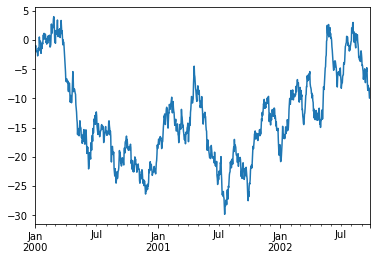

In [135]:
ts.plot()

On a DataFrame, the plot() method is a convenience to plot all of the columns with labels:

In [136]:
df = pd.DataFrame(
     np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
 )

In [137]:
df = df.cumsum()

In [138]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

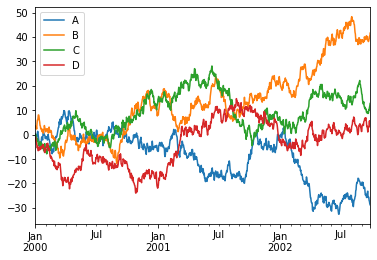

In [139]:
df.plot()

No handles with labels found to put in legend.


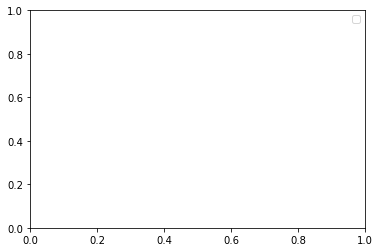

In [140]:
plt.legend(loc='best')

## Getting data in/out
### CSV

In [141]:
df.to_csv("foo.csv")

In [142]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.219951,3.560917,0.154264,-1.459604
1,2000-01-02,-0.821414,2.972870,0.139232,-1.123409
2,2000-01-03,-1.669037,2.623855,-0.220909,-2.557193
3,2000-01-04,-1.915466,3.111687,-0.842723,-3.378510
4,2000-01-05,-1.478894,2.295225,-2.688716,-3.941703
...,...,...,...,...,...
995,2002-09-22,-25.629482,38.564499,10.275065,3.032328
996,2002-09-23,-26.957252,39.275999,10.007011,3.994444
997,2002-09-24,-27.368683,40.236146,11.096842,5.665191
998,2002-09-25,-28.342505,39.505877,11.779460,3.455693


### HDF5

In [143]:
df.to_hdf("foo.h5", "df")

In [144]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.219951,3.560917,0.154264,-1.459604
2000-01-02,-0.821414,2.972870,0.139232,-1.123409
2000-01-03,-1.669037,2.623855,-0.220909,-2.557193
2000-01-04,-1.915466,3.111687,-0.842723,-3.378510
2000-01-05,-1.478894,2.295225,-2.688716,-3.941703
...,...,...,...,...
2002-09-22,-25.629482,38.564499,10.275065,3.032328
2002-09-23,-26.957252,39.275999,10.007011,3.994444
2002-09-24,-27.368683,40.236146,11.096842,5.665191
2002-09-25,-28.342505,39.505877,11.779460,3.455693


### Excel

In [145]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [146]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.219951,3.560917,0.154264,-1.459604
1,2000-01-02,-0.821414,2.972870,0.139232,-1.123409
2,2000-01-03,-1.669037,2.623855,-0.220909,-2.557193
3,2000-01-04,-1.915466,3.111687,-0.842723,-3.378510
4,2000-01-05,-1.478894,2.295225,-2.688716,-3.941703
...,...,...,...,...,...
995,2002-09-22,-25.629482,38.564499,10.275065,3.032328
996,2002-09-23,-26.957252,39.275999,10.007011,3.994444
997,2002-09-24,-27.368683,40.236146,11.096842,5.665191
998,2002-09-25,-28.342505,39.505877,11.779460,3.455693
